In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [6]:
style.use('ggplot')

In [23]:
class SVM:
    def __init__(self, visualization=True):
        
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self, data):
        self.data = data
        opt_dict = {}
        
        transforms = [[1,1],[1,-1],[-1,1],[-1,-1]]
        
        self.max_feature_value = None
        self.min_feature_value = None
        for i in sample_data:
            for featureset in sample_data[i]:
                for feature in featureset:
                    if self.max_feature_value == None and self.min_feature_value == None:
                        self.max_feature_value = feature
                        self.min_feature_value = feature
                    else:
                        if feature > self.max_feature_value:
                            self.max_feature_value = feature
                
                        if feature < self.min_feature_value:
                            self.min_feature_value = feature
        
        step_sizes = [self.max_feature_value*0.1,
                      self.max_feature_value*0.01,
                      self.max_feature_value*0.001]
        
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), self.max_feature_value*b_range_multiple,
                                    step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for yi in self.data:
                            for xi in self.data[yi]:
                                if not yi*(np.dot(w_t,xi)+b) >=1:
                                    found_option = False
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                
                if w[0] < 0:
                    optimized = True
                    print("Optimized a step")
                else:
                    w = w-step
            
            norms = sorted([n for n in opt_dict])
            
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        
        for yi in self.data:
            for xi in self.data[yi]:
                print(xi,": ", yi*(np.dot(self.w,xi)+self.b))
        
        
        
        
    
    def predict(self, features):
        
        #sign of (x.w+b)
        
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1], s=200, marker='*', c = self.colors[classification])
                
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1], s=100, color=self.colors[i]) for x in sample_data[i]] for i in sample_data]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = [self.min_feature_value*0.9, self.max_feature_value*1.1]
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2])
    
        
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2])

                
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2])
        
        plt.show()
    
    
    

Optimized a step
Optimized a step
Optimized a step
[1, -3] :  3.0300000000026994
[2, 1] :  1.580000000002708
[3, 2] :  1.0000000000027112
[7, 5] :  1.029999999997277
[9, 6] :  1.8999999999972719
[10, 9] :  3.059999999997265


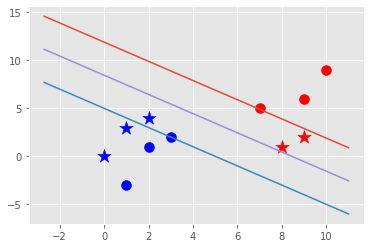

In [33]:
sample_data = {-1:[[1,-3],[2,1],[3,2]], 1:[[7,5], [9,6], [10,9]]}

svm = SVM()

svm.fit(data=sample_data)


predict_data = [[1,3],[0,0],[8,1],[9,2],[2,4]]

for p in predict_data:
        svm.predict(p)

svm.visualize()



# for i in sample_data:
#     for featureset in sample_data[i]:
#         for feature in featureset:
#             if maxi == None and mini == None:
#                 maxi = feature
#                 mini = feature
#             else:
#                 if feature > maxi:
#                     maxi = feature
                
#                 if feature < mini:
#                     mini = feature
                    
                    
# print(maxi, mini)

#maxi = None
#mini = None
# for i in sample_data:
    
#     if maxi == None and mini == None:
        
#         maxi = max(sample_data[i])
#         mini = min(sample_data[i])
#     else:
#         if max(sample_data[i]) > maxi:
#             maxi = max(sample_data[i])
        
#         if min(sample_data[i]) < mini:
#             mini = min(sample_data[i])

